In [10]:
import os, sys
import json 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 
from sklearn.feature_extraction.text import TfidfVectorizer

sys.path.append(os.path.abspath('..'))
from rnn_class.brown import get_sentences_with_word2idx_limit_vocab

In [2]:
sentences, word2idx = get_sentences_with_word2idx_limit_vocab()
print('finished retriveing data')
print('vocab size:', len(word2idx), 'number of sentences:', len(sentences))


because 883
each 877
just 872
those 850
people 847
mr. 844
too 834
how 834
little 831
state 807
good 806
very 796
make 794
world 787
still 782
see 772
own 772
men 763
work 762
long 752
here 750
get 749
both 730
between 730
life 715
being 712
under 707
never 697
day 687
same 686
another 684
know 683
while 680
last 676
us 675
might 672
great 665
old 661
year 658
off 639
come 630
since 628
against 627
go 626
came 622
right 613
used 611
take 610
three 610
himself 603
states 603
few 601
house 591
use 591
during 585
without 583
again 577
place 570
american 569
around 562
however 552
home 547
small 542
found 536
mrs. 534
1 527
thought 517
went 507
say 504
part 500
once 499
general 498
high 497
upon 495
school 493
every 491
don't 489
does 485
got 482
united 482
left 480
number 472
course 465
war 464
until 461
always 458
away 456
something 450
fact 447
2 446
water 445
though 440
public 438
less 437
put 437
think 433
almost 432
hand 431
enough 430
took 426
far 426
head 424
yet 419
government 41

In [3]:
# 為了直接使用 TfidfVectorizer 將內部已經是 index 的 sentences 轉回 文字
idx2word = {v:k for k, v in word2idx.items()}
sentences_tfidf = []
for sent in sentences:
    string = ''
    # print(sent)
    for j in sent:
        if j in idx2word.keys():
            # print(idx2word[j])
            string = string + idx2word[j] + ' '
    sentences_tfidf.append(string)

print(len(sentences_tfidf)) #57013

57013


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences_tfidf)
X.shape  # (57013, 1934)   
# tf-idf矩陣將具有[Number_documents，Size_of_vocabulary]
# 但是我在這邊已經不知道每個  vocabulary column 對應的是什麼詞彙
# 也就無法用annotate 畫圖


'''
本來想用方便的TfidfVectorizer() 把文本丟進去，直接取得 TD-IDF

但轉換出來的 X  他的欄位順序已經不能用idx2word代表了，所以不能這樣寫，

要自行創造出Count Tabel ，就像是CountVectorizer()的效果
再搭配TfidfTransformer()

這篇要再改過
'''

(57013, 1934)

In [83]:
Z = X.T  #(1934, 57013)
model = TSNE()
Z = model.fit_transform(X)

(1934, 57013)

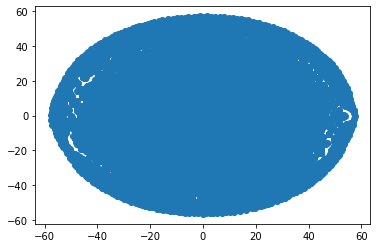

In [88]:
plt.scatter(Z[:,0], Z[:,1])
plt.show()